**Objective: To detect fake news**

**Data set link** : https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view

* Try different models and techniques and come up with best solution with reasons explaining why is it the best solution!
Some of the models you can use: Simplest Logistic,Trees,Forest,XGB,Ada Boost, Ensemble methods

* These are only a few examples, it is not mandatory to try them.
* You need to pick any 10 models based on your own research and thinking,use them to analyse the data, and suggest which model Riveldy should use to detect fake news/fake posts and why?

* You can assume details, if any , that is missing in this task.

* Just state your assumptions in your submission.

* You can use any tool for this task, it is completly upon you.

* Format: Upload a ppt in pdf format with your suggestions supported by reasoning.

**Deadline: 14th-May-2020**

Submission: Google Form from app.

## Libraries and Functions

In [0]:
import pandas as pd
import string


import scikitplot as skplt
import matplotlib.pyplot as plt


In [0]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import re, string, unicodedata
import nltk
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import tree
from sklearn import linear_model, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import GridSearchCV
import xgboost
from collections import Counter

In [0]:
#Function to create ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    plt.plot([0,1],[0,1],color='darkblue',label='Guessing',linestyle='--')

    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.xlabel('False Positve Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Area Under ROC curve')
    plt.show()

In [0]:
def norm_url(text):  
  return re.sub(r'http\S+|www.\S+|pic.\S+', 'someurl',text.lower())

def norm_email(text):  
  return re.sub(r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+', 'someemail',text)

def norm_tag(text):  
  return re.sub(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)', 'somehand',text)

def process_text(text):
  token_words = nltk.word_tokenize(text)
  return token_words

def norm_numbers(words):
  """Replace all interger occurrences in list of tokenized words with somenumber"""
  new_words = []
  for word in words:
      if word.isdigit():
          new_word = 'somenumber'
          new_words.append(new_word)
      else:
          new_words.append(word)
  return new_words


def remove_non_ascii(words):
  """Remove non-ASCII characters from list of tokenized words"""
  new_words = []
  for word in words:
      new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
      new_words.append(new_word)
  return new_words

def to_lowercase(words):
  """Convert all characters to lowercase from list of tokenized words"""
  new_words = []
  for word in words:
      new_word = word.lower()
      new_words.append(new_word)
  return new_words


def remove_punctuation(words):
  """Remove punctuation from list of tokenized words"""
  new_words = []
  for word in words:
      new_word = re.sub(r'[^\w\s]', '', word)
      if new_word != '':
          new_words.append(new_word)
  return new_words

def replace_numbers(words):
  """Replace all interger occurrences in list of tokenized words with textual representation"""
  p = inflect.engine()
  new_words = []
  for word in words:
      if word.isdigit():
          new_word = p.number_to_words(word)
          new_words.append(new_word)
      else:
          new_words.append(word)
  return new_words

def remove_stopwords(words):
  """Remove stop words from list of tokenized words"""
  new_words = []
  for word in words:
      if word not in stopwords.words('english'):
          new_words.append(word)
  return new_words

def stem_words(words):
  """Stem words in list of tokenized words"""
  stemmer = LancasterStemmer()
  stems = []
  for word in words:
      stem = stemmer.stem(word)
      stems.append(stem)
  return stems

def lemmatize_verbs(words):
  """Lemmatize verbs in list of tokenized words"""
  lemmatizer = WordNetLemmatizer()
  lemmas = []
  for word in words:
      lemma = lemmatizer.lemmatize(word, pos='v')
      lemmas.append(lemma)
  return lemmas

def normalize(text):

  words = process_text(text)
  words = norm_numbers(words)
  words = remove_non_ascii(words)
  words = to_lowercase(words)
  words = remove_punctuation(words)
  words = replace_numbers(words)
  words = remove_stopwords(words)
  # words = stem_words(words)
  words = lemmatize_verbs(words)
  return words

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = (np.trace(cf) / float(np.sum(cf))) * 100

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2f} %\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pd.set_option('display.max_colwidth', 50)

In [0]:
df = pd.read_csv('drive/My Drive/Task 3/news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [0]:
df.drop(labels = 'Unnamed: 0',axis=1,inplace = True)

In [0]:
df.drop_duplicates(inplace = True)

In [0]:
df.shape

(6306, 3)

In [0]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [0]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [0]:
df.groupby('label').count()

,title,text
label,,
FAKE,3152,3152
REAL,3154,3154


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6306 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6306 non-null   object
 1   text    6306 non-null   object
 2   label   6306 non-null   object
dtypes: object(3)
memory usage: 197.1+ KB


In [0]:
df.replace({'label' : {'FAKE':1 , 'REAL':0}},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6306 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6306 non-null   object
 1   text    6306 non-null   object
 2   label   6306 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 197.1+ KB


In [0]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0


In [0]:
df.to_csv('drive/My Drive/Task 3/news_clean.csv',index=False)

## Complete Dataset

In [0]:
df_tmp = pd.read_csv('drive/My Drive/Task 3/news_clean.csv')
df_tmp

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0
...,...,...,...
6301,State Department says it can't find emails fro...,The State Department told the Republican Natio...,0
6302,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,1
6303,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,1
6304,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",0


In [0]:
X_train,X_test,y_train,y_test = train_test_split(df_tmp.drop('label',axis=1),df_tmp.label,random_state =42)

In [0]:
import numpy as np
a = np.random.rand(4,3)
b = np.random.rand(3,1)

In [0]:
np.sum(a,axis=1).shape

(4,)

## 1. Using Count Vectorizer Features

In [0]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer=normalize)
xtrain_count = count_vect.fit_transform(X_train['title'] + ' ' + X_train['text'])
xtest_count =  count_vect.transform(X_test['title'] + ' ' + X_test['text'])

In [0]:
xtrain_count

<4729x63898 sparse matrix of type '<class 'numpy.int64'>'
	with 1244109 stored elements in Compressed Sparse Row format>

### KNN

0.7723525681674065

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       805
           1       0.79      0.73      0.76       772

    accuracy                           0.77      1577
   macro avg       0.77      0.77      0.77      1577
weighted avg       0.77      0.77      0.77      1577

[[656 149]
 [210 562]]



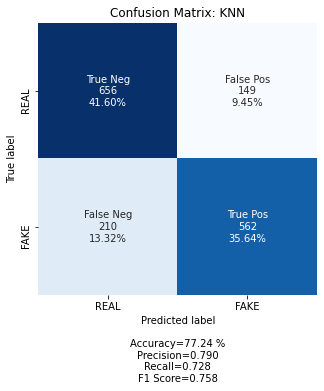

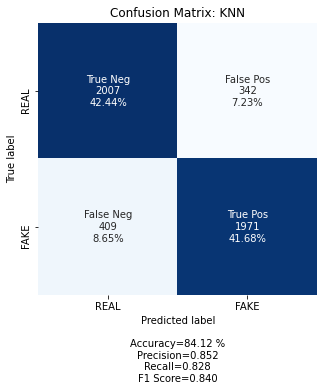

In [0]:
knn = KNeighborsClassifier()
knn.fit(xtrain_count,y_train)
y_preds = knn.predict(xtest_count)
print(accuracy_score(y_test,y_preds))
print()
print(classification_report(y_test,y_preds))
cf_1 =confusion_matrix(y_test,y_preds)
print(cf_1)
print()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL','FAKE']
make_confusion_matrix(cf_1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: KNN')
make_confusion_matrix(confusion_matrix(y_train,knn.predict(xtrain_count)), 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: KNN')

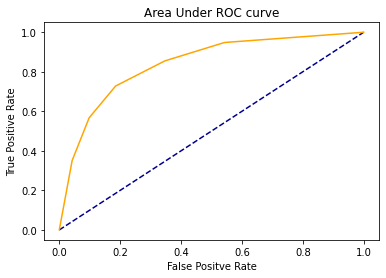

In [0]:
y_proba = knn.predict_proba(xtest_count)
y_proba[:10]
y_proba_positive = y_proba[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_proba_positive)
plot_roc_curve(fpr,tpr)

### Decision Tree

0.813570069752695

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       805
           1       0.80      0.82      0.81       772

    accuracy                           0.81      1577
   macro avg       0.81      0.81      0.81      1577
weighted avg       0.81      0.81      0.81      1577

[[648 157]
 [137 635]]



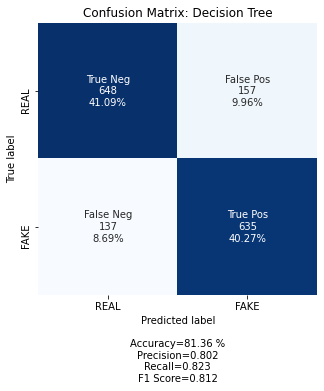

In [0]:
dt = tree.DecisionTreeClassifier()
dt.fit(xtrain_count,y_train)
y_preds = dt.predict(xtest_count)
print(accuracy_score(y_test,y_preds))
print()
print(classification_report(y_test,y_preds))
cf_2 =confusion_matrix(y_test,y_preds)
print(cf_2)
print()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL','FAKE']
make_confusion_matrix(cf_2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: Decision Tree')

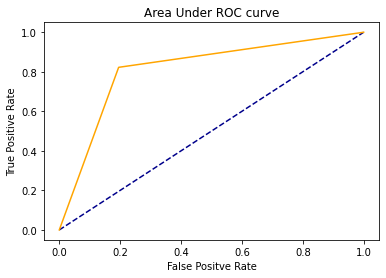

In [0]:
y_proba = dt.predict_proba(xtest_count)
y_proba[:10]
y_proba_positive = y_proba[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_proba_positive)
plot_roc_curve(fpr,tpr)

### Nearest Centroid

0.7247939124920736

              precision    recall  f1-score   support

           0       0.82      0.59      0.69       805
           1       0.67      0.87      0.76       772

    accuracy                           0.72      1577
   macro avg       0.75      0.73      0.72      1577
weighted avg       0.75      0.72      0.72      1577

[[474 331]
 [103 669]]



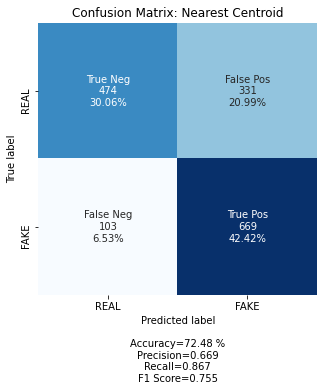

In [0]:
nc = NearestCentroid()
nc.fit(xtrain_count,y_train)
y_preds = nc.predict(xtest_count)
print(accuracy_score(y_test,y_preds))
print()
print(classification_report(y_test,y_preds))
cf_3 =confusion_matrix(y_test,y_preds)
print(cf_3)
print()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL','FAKE']
make_confusion_matrix(cf_3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: Nearest Centroid')

### Naive Bayes Classifier

In [0]:
nbc = naive_bayes.MultinomialNB()
nbc.fit(xtrain_count,y_train)
y_preds = nbc.predict(xtest_count)

0.8991756499682942

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       805
           1       0.93      0.86      0.89       772

    accuracy                           0.90      1577
   macro avg       0.90      0.90      0.90      1577
weighted avg       0.90      0.90      0.90      1577

[[754  51]
 [108 664]]



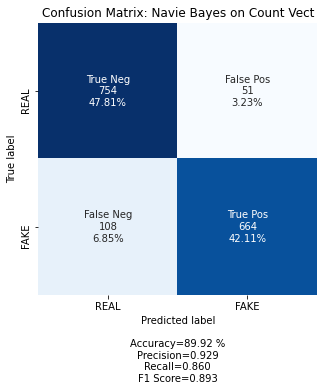

In [0]:
print(accuracy_score(y_test,y_preds))
print()
print(classification_report(y_test,y_preds))
cf_matrix_1 =confusion_matrix(y_test,y_preds)
print(cf_matrix_1)
print()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL', 'FAKE']
make_confusion_matrix(cf_matrix_1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: Navie Bayes on Count Vect')

In [0]:
# with stemming and with num conversion : 89.6,0.918,0.865,0.891
# with stemming and without num conversion: 89.66,0.917,0.868,0.892
# without stemming and with num conversion: 90.11,0.928,0.865,0.895
# without stemming and without num conversion: 90.36,0.932,0.867,0.898

### Logistic Regression

In [0]:
lr = linear_model.LogisticRegression(max_iter=500)
lr.fit(xtrain_count,y_train)
y_preds = lr.predict(xtest_count)

0.9131261889663919

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       805
           1       0.92      0.90      0.91       772

    accuracy                           0.91      1577
   macro avg       0.91      0.91      0.91      1577
weighted avg       0.91      0.91      0.91      1577


[[742  63]
 [ 74 698]]


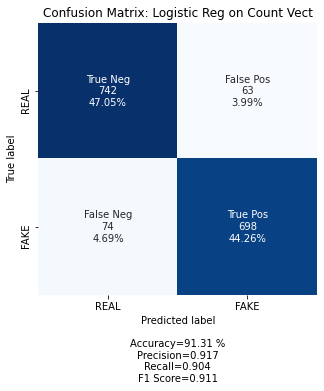

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
print()
cf_matrix_2 = confusion_matrix(y_test,y_preds)
print(cf_matrix_2 )
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL', 'FAKE']
make_confusion_matrix(cf_matrix_2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title= 'Confusion Matrix: Logistic Reg on Count Vect')

In [0]:
y_preds

array([0, 1, 1, ..., 0, 1, 0])

In [0]:
y_proba = lr.predict_proba(xtest_count)
y_proba[:10]

array([[9.98755899e-01, 1.24410146e-03],
       [1.21311235e-01, 8.78688765e-01],
       [1.24434511e-01, 8.75565489e-01],
       [2.52268022e-02, 9.74773198e-01],
       [4.15027277e-03, 9.95849727e-01],
       [9.96775849e-01, 3.22415073e-03],
       [1.00000000e+00, 1.39517670e-33],
       [1.31344598e-04, 9.99868655e-01],
       [2.30075134e-01, 7.69924866e-01],
       [3.40998581e-01, 6.59001419e-01]])

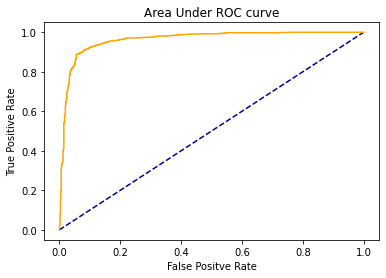

In [0]:
y_proba = lr.predict_proba(xtest_count)
y_proba[:10]
y_proba_positive = y_proba[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_proba_positive)
plot_roc_curve(fpr,tpr)

In [0]:
# with stemming and with num conversion : 91.31,0.922,0.899,0.91
# with stemming and without num conversion: 91.69,0.927,0.902,0.914
# without stemming and with num conversion: 91.76,0.92,0.911,0.915
# without stemming and without num conversion: 92.01,0.921,0.916,0.918

### Randomforest Classifier

In [0]:
rfc = RandomForestClassifier()
rfc.fit(xtrain_count,y_train)
y_preds = rfc.predict(xtest_count)

0.9004438807863031

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       805
           1       0.90      0.90      0.90       772

    accuracy                           0.90      1577
   macro avg       0.90      0.90      0.90      1577
weighted avg       0.90      0.90      0.90      1577

[[729  76]
 [ 81 691]]


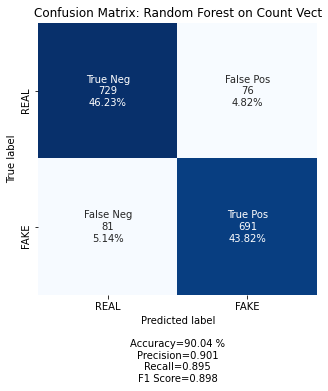

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
cf_matrix_3 = confusion_matrix(y_test,y_preds)
print(cf_matrix_3)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL', 'FAKE']
make_confusion_matrix(cf_matrix_3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: Random Forest on Count Vect')

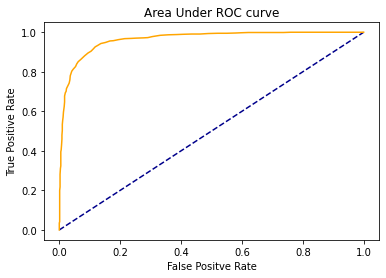

In [0]:
y_proba = rfc.predict_proba(xtest_count)
y_proba[:10]
y_proba_positive = y_proba[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_proba_positive)
plot_roc_curve(fpr,tpr)

In [0]:
# with stemming and with num conversion : 90.17,0.9,0.899,0.9
# with stemming and without num conversion: 89.41,0.898,0.885,0.891
# without stemming and with num conversion: 90.68,0.906,0.903,0.905
# without stemming and without num conversion: 89.92,0.903,0.89,0.896

### SVM

In [0]:
svc = svm.SVC()
svc.fit(xtrain_count,y_train)
y_preds = svc.predict(xtest_count)

0.8687381103360812

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       805
           1       0.82      0.94      0.87       772

    accuracy                           0.87      1577
   macro avg       0.87      0.87      0.87      1577
weighted avg       0.88      0.87      0.87      1577



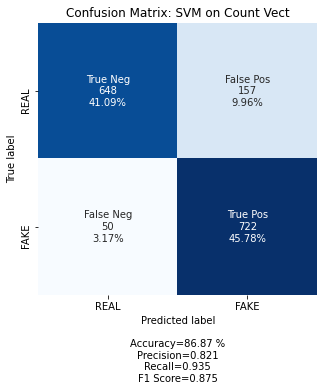

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
cf_matrix_4 = confusion_matrix(y_test,y_preds)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL', 'FAKE']
make_confusion_matrix(cf_matrix_4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: SVM on Count Vect')

In [0]:
y_proba = svc.predict_proba(xtest_count)
y_proba[:10]
y_proba_positive = y_proba[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_proba_positive)
plot_roc_curve(fpr,tpr)

AttributeError: ignored

In [0]:

# with stemming and with num conversion : 87.44,0.831,0.934,0.879
# with stemming and without num conversion: 87.38,0.829,0.935,0.879
# without stemming and with num conversion: 87.06,0.826,0.931,0.876
# without stemming and without num conversion: 87.19,0.826,0.935,0.877

### SGD classifier

0.9112238427393786

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       805
           1       0.92      0.89      0.91       772

    accuracy                           0.91      1577
   macro avg       0.91      0.91      0.91      1577
weighted avg       0.91      0.91      0.91      1577

[[748  57]
 [ 83 689]]



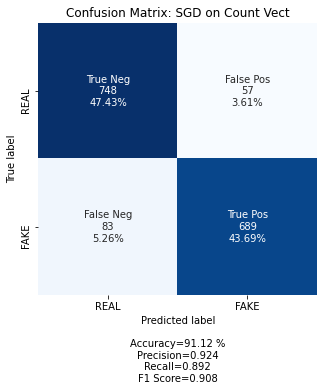

In [0]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state=42)
clf.fit(xtrain_count,y_train)
y_preds = clf.predict(xtest_count)
print(accuracy_score(y_test,y_preds))
print()
print(classification_report(y_test,y_preds))
cf_1 =confusion_matrix(y_test,y_preds)
print(cf_1)
print()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL','FAKE']
make_confusion_matrix(cf_1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: SGD on Count Vect')

### Gradient Boosting Classifier

0.8966391883322765

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       805
           1       0.87      0.92      0.90       772

    accuracy                           0.90      1577
   macro avg       0.90      0.90      0.90      1577
weighted avg       0.90      0.90      0.90      1577

[[700 105]
 [ 58 714]]



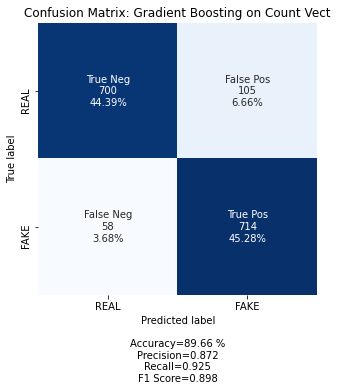

In [0]:
gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(xtrain_count,y_train)
y_preds = gbc.predict(xtest_count)
print(accuracy_score(y_test,y_preds))
print()
print(classification_report(y_test,y_preds))
cf_2 =confusion_matrix(y_test,y_preds)
print(cf_2)
print()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL','FAKE']
make_confusion_matrix(cf_2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: Gradient Boosting on Count Vect')

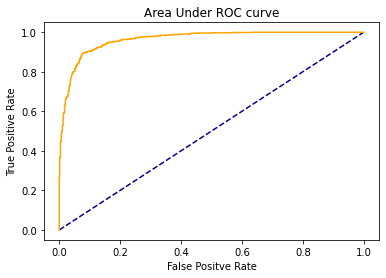

In [0]:
y_proba = gbc.predict_proba(xtest_count)
y_proba[:10]
y_proba_positive = y_proba[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_proba_positive)
plot_roc_curve(fpr,tpr)

### XGBoost

In [0]:
xgc = xgboost.XGBClassifier()
xgc.fit(xtrain_count,y_train)
y_preds = xgc.predict(xtest_count)

0.8928344958782498

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       805
           1       0.86      0.93      0.89       772

    accuracy                           0.89      1577
   macro avg       0.89      0.89      0.89      1577
weighted avg       0.89      0.89      0.89      1577



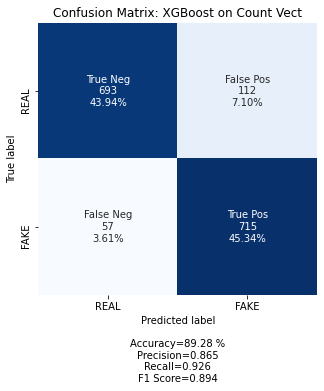

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
cf_matrix_5 = confusion_matrix(y_test,y_preds)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL', 'FAKE']
make_confusion_matrix(cf_matrix_5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: XGBoost on Count Vect')

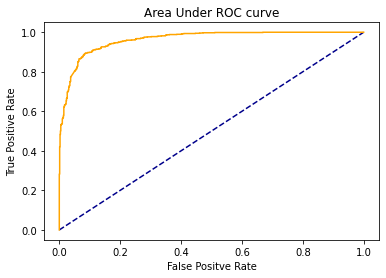

In [0]:
y_proba = xgc.predict_proba(xtest_count)
y_proba[:10]
y_proba_positive = y_proba[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_proba_positive)
plot_roc_curve(fpr,tpr)

In [0]:
# with stemming and with num conversion : 90.49,0.88,0.933,0.906
# with stemming and without num conversion: 89.98,0.879,0.922,0.9
# without stemming and with num conversion: 90.62,0.884,0.930,0.907
# without stemming and without num conversion: 90.36,0.881,0.929,0.904

## Using word level tf-idf Features


In [0]:
# word level tf-idf

tfidf_vect = TfidfTransformer()
xtrain_tfidf = tfidf_vect.fit_transform(xtrain_count)
xtest_tfidf =  tfidf_vect.transform(xtest_count)

### KNN

0.8465440710209258

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       805
           1       0.92      0.75      0.83       772

    accuracy                           0.85      1577
   macro avg       0.86      0.84      0.84      1577
weighted avg       0.86      0.85      0.85      1577

[[754  51]
 [191 581]]



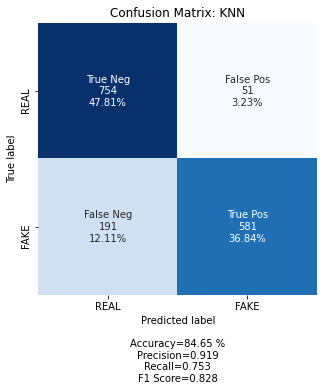

In [0]:
knn = KNeighborsClassifier()
knn.fit(xtrain_tfidf,y_train)
y_preds = knn.predict(xtest_tfidf)
print(accuracy_score(y_test,y_preds))
print()
print(classification_report(y_test,y_preds))
cf_11 =confusion_matrix(y_test,y_preds)
print(cf_11)
print()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL','FAKE']
make_confusion_matrix(cf_11, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: KNN')

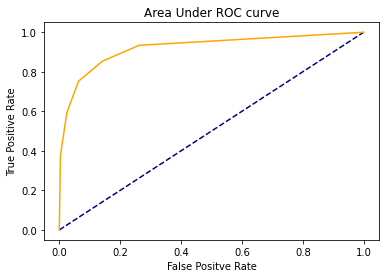

In [0]:
y_proba = knn.predict_proba(xtest_tfidf)
y_proba[:10]
y_proba_positive = y_proba[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_proba_positive)
plot_roc_curve(fpr,tpr)

### Decision Tree

0.8192771084337349

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       805
           1       0.81      0.82      0.82       772

    accuracy                           0.82      1577
   macro avg       0.82      0.82      0.82      1577
weighted avg       0.82      0.82      0.82      1577

[[661 144]
 [141 631]]



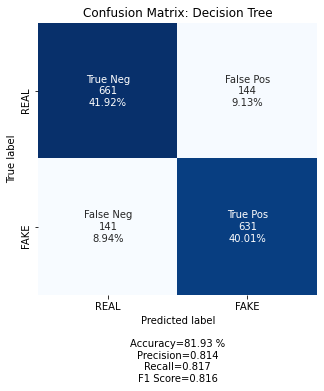

In [0]:
dt = tree.DecisionTreeClassifier()
dt.fit(xtrain_tfidf,y_train)
y_preds = dt.predict(xtest_tfidf)
print(accuracy_score(y_test,y_preds))
print()
print(classification_report(y_test,y_preds))
cf_12 =confusion_matrix(y_test,y_preds)
print(cf_12)
print()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL','FAKE']
make_confusion_matrix(cf_12, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: Decision Tree')

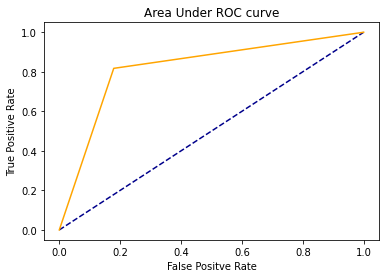

In [0]:
y_proba = dt.predict_proba(xtest_tfidf)
y_proba[:10]
y_proba_positive = y_proba[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_proba_positive)
plot_roc_curve(fpr,tpr)

### Nearest Centroid

0.8192771084337349

              precision    recall  f1-score   support

           0       0.89      0.73      0.81       805
           1       0.77      0.91      0.83       772

    accuracy                           0.82      1577
   macro avg       0.83      0.82      0.82      1577
weighted avg       0.83      0.82      0.82      1577

[[590 215]
 [ 70 702]]



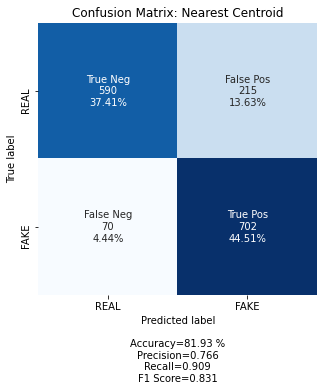

In [0]:
nc = NearestCentroid()
nc.fit(xtrain_tfidf,y_train)
y_preds = nc.predict(xtest_tfidf)
print(accuracy_score(y_test,y_preds))
print()
print(classification_report(y_test,y_preds))
cf_13 =confusion_matrix(y_test,y_preds)
print(cf_13)
print()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL','FAKE']
make_confusion_matrix(cf_13, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: Nearest Centroid')

### Naive Bayes Classifier

In [0]:
nbc = naive_bayes.MultinomialNB()
nbc.fit(xtrain_tfidf,y_train)
y_preds = nbc.predict(xtest_tfidf)

0.849714648065948

              precision    recall  f1-score   support

           0       0.78      0.99      0.87       805
           1       0.98      0.71      0.82       772

    accuracy                           0.85      1577
   macro avg       0.88      0.85      0.85      1577
weighted avg       0.88      0.85      0.85      1577

[[793  12]
 [225 547]]


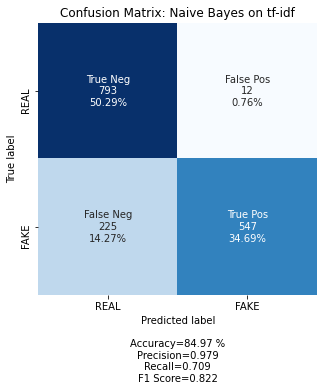

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
cf_matrix_6 =confusion_matrix(y_test,y_preds)
print(cf_matrix_6)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL', 'FAKE']
make_confusion_matrix(cf_matrix_6, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: Naive Bayes on tf-idf')

In [0]:
# with stemming and with num conversion : 85.8,0.974,0.729,0.834
# with stemming and without num conversion: 85.92,0.974,0.732,0.836
# without stemming and with num conversion: 85.42,0.979,0.718,0.828
# without stemming and without num conversion: 85.67,0.979,0.723,0.832

### Random Forest Cassifier

In [0]:
rfc = RandomForestClassifier()
rfc.fit(xtrain_tfidf,y_train)
y_preds = rfc.predict(xtest_tfidf)

0.8991756499682942

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       805
           1       0.90      0.90      0.90       772

    accuracy                           0.90      1577
   macro avg       0.90      0.90      0.90      1577
weighted avg       0.90      0.90      0.90      1577

[[724  81]
 [ 78 694]]


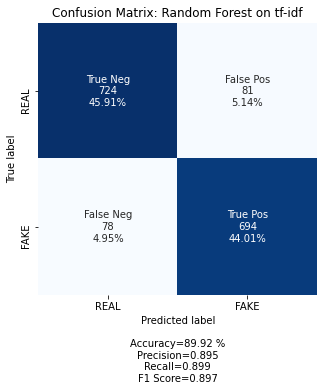

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
cf_matrix_8 =confusion_matrix(y_test,y_preds)
print(cf_matrix_8)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL', 'FAKE']
make_confusion_matrix(cf_matrix_8, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: Random Forest on tf-idf')

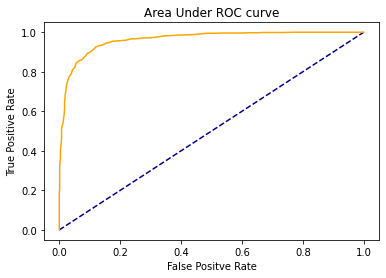

In [0]:
y_proba = rfc.predict_proba(xtest_tfidf)
y_proba[:10]
y_proba_positive = y_proba[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_proba_positive)
plot_roc_curve(fpr,tpr)

In [0]:
# with stemming and with num conversion : 90.55,0.904,0.903,0.903
# with stemming and without num conversion: 91.38,0.914,0.909,0.912
# without stemming and with num conversion: 90.17,0.903,0.895,0.899
# without stemming and without num conversion: 91.06,0.905,0.913,0.909

### Logistic regression

In [0]:
lr = linear_model.LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
lr.fit(xtrain_tfidf,y_train)
y_preds = lr.predict(xtest_tfidf)

0.9340519974635384

[[755  50]
 [ 54 718]]


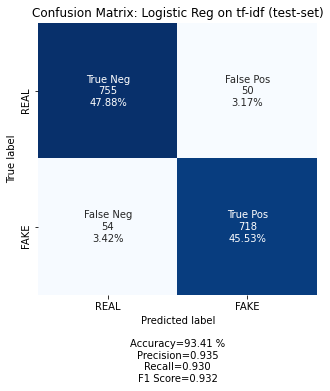

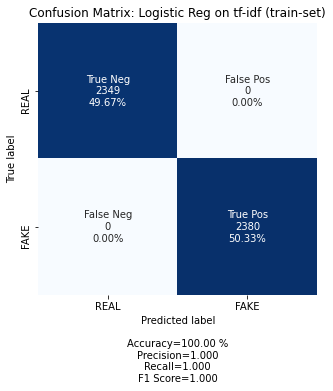

In [0]:
print(accuracy_score(y_test,y_preds))
print()

# print(classification_report(y_test,y_preds))
cf_matrix_7 =confusion_matrix(y_test,y_preds)
print(cf_matrix_7)
# labels = ['True Neg','False Pos','False Neg','True Pos']
# categories = ['REAL', 'FAKE']
make_confusion_matrix(cf_matrix_7, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: Logistic Reg on tf-idf (test-set)' )
make_confusion_matrix(confusion_matrix(y_train,lr.predict(xtrain_tfidf)), 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: Logistic Reg on tf-idf (train-set)')

In [0]:
# C=100.0, class_weight=None, dual=False, fit_intercept=True,
#                    intercept_scaling=1, l1_ratio=None, max_iter=500,
#                    multi_class='auto', n_jobs=None, penalty='l2',
#                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
#                    warm_start=False

In [0]:

param_grid = {'penalty' : ['l1', 'l2'],
               'C' : np.logspace(-4, 2, 20),
               'solver' : ['liblinear']}

# Create grid search object

clf = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(xtest_tfidf, y_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.4s finished


In [0]:
best_clf.best_estimator_

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
best_clf.best_score_

0.9086718906972072

In [0]:
best_clf.best_params_

{'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}

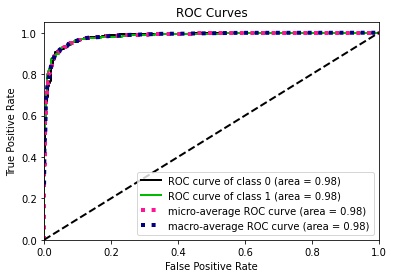

In [0]:


y_probas = lr.predict_proba(xtest_tfidf)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show();

In [0]:
# with stemming and with num conversion : 92.2,0.911,0.931,0.921
# with stemming and without num conversion: 92.07,0.91,0.93,0.92
# without stemming and with num conversion: 92.33,0.91,0.935,0.923
# without stemming and without num conversion: 92.58,0.914,0.937,0.925

### SVM

[[737  68]
 [ 43 729]]


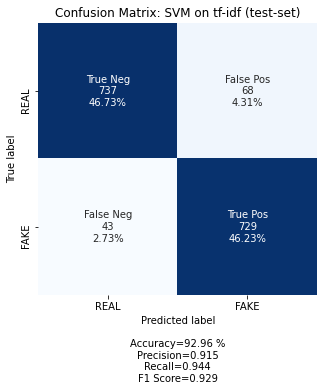

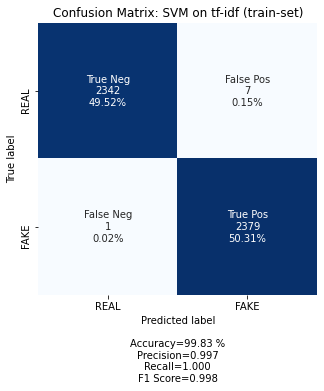

In [0]:
svc = svm.SVC()
svc.fit(xtrain_tfidf,y_train)
y_preds = svc.predict(xtest_tfidf)
# print(accuracy_score(y_test,y_preds))
# print()

# print(classification_report(y_test,y_preds))
cf_matrix_9 =confusion_matrix(y_test,y_preds)
print(cf_matrix_9)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL', 'FAKE']
make_confusion_matrix(cf_matrix_9, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: SVM on tf-idf (test-set)')
make_confusion_matrix(confusion_matrix(y_train,svc.predict(xtrain_tfidf)), 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: SVM on tf-idf (train-set)')

In [0]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}
clf = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(xtrain_tfidf, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.9min


In [0]:
best_clf.best_score_

0.9080349608197709

In [0]:
# with stemming and with num conversion : 93.20,0.92,0.939,0.929
# with stemming and without num conversion: 93.09,0.921,0.939,0.930
# without stemming and with num conversion: 93.21,0.917,0.947,0.932
# without stemming and without num conversion: 93.15,0.917,0.946,0.931

### SGD classifier

0.9384908053265695

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       805
           1       0.94      0.93      0.94       772

    accuracy                           0.94      1577
   macro avg       0.94      0.94      0.94      1577
weighted avg       0.94      0.94      0.94      1577

[[759  46]
 [ 51 721]]



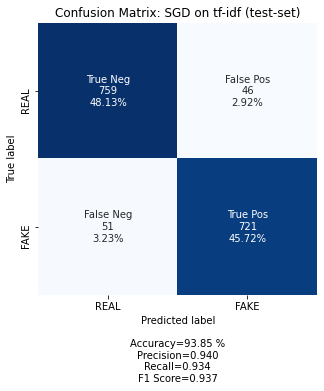

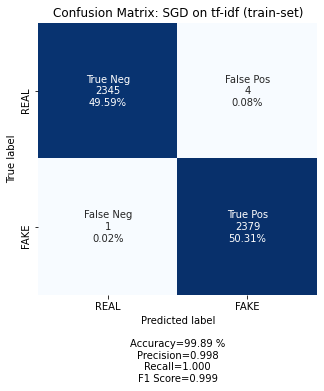

In [0]:

clf = SGDClassifier(random_state=42)
clf.fit(xtrain_tfidf,y_train)
y_preds = clf.predict(xtest_tfidf)
print(accuracy_score(y_test,y_preds))
print()
print(classification_report(y_test,y_preds))
cf_1 =confusion_matrix(y_test,y_preds)
print(cf_1)
print()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL','FAKE']
make_confusion_matrix(cf_1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: SGD on tf-idf (test-set)')
make_confusion_matrix(confusion_matrix(y_train,clf.predict(xtrain_tfidf)), 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: SGD on tf-idf (train-set)')

### Gradient Boosting Classifier

0.8909321496512366

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       805
           1       0.88      0.90      0.89       772

    accuracy                           0.89      1577
   macro avg       0.89      0.89      0.89      1577
weighted avg       0.89      0.89      0.89      1577

[[707  98]
 [ 74 698]]



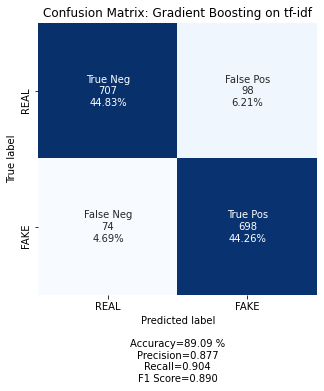

In [0]:
gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(xtrain_tfidf,y_train)
y_preds = gbc.predict(xtest_tfidf)
print(accuracy_score(y_test,y_preds))
print()
print(classification_report(y_test,y_preds))
cf_2 =confusion_matrix(y_test,y_preds)
print(cf_2)
print()
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL','FAKE']
make_confusion_matrix(cf_2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: Gradient Boosting on tf-idf')

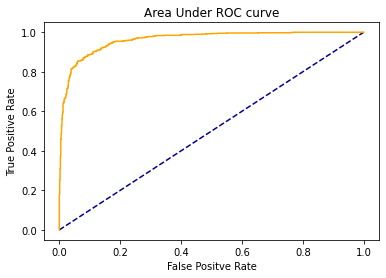

In [0]:
y_proba = gbc.predict_proba(xtest_tfidf)
y_proba[:10]
y_proba_positive = y_proba[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_proba_positive)
plot_roc_curve(fpr,tpr)

### XGBoost

In [0]:
xgc = xgboost.XGBClassifier()
xgc.fit(xtrain_tfidf,y_train)
y_preds = xgc.predict(xtest_tfidf)

0.8972733037412809

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       805
           1       0.88      0.92      0.90       772

    accuracy                           0.90      1577
   macro avg       0.90      0.90      0.90      1577
weighted avg       0.90      0.90      0.90      1577

[[706  99]
 [ 63 709]]


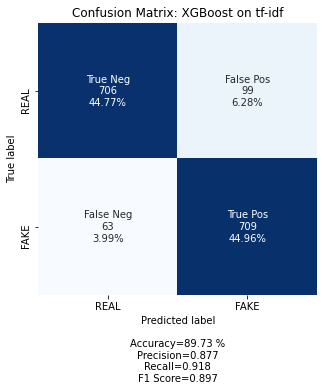

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
cf_matrix_10 =confusion_matrix(y_test,y_preds)
print(cf_matrix_10)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['REAL', 'FAKE']
make_confusion_matrix(cf_matrix_10, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='Confusion Matrix: XGBoost on tf-idf')

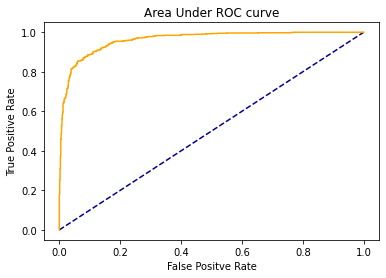

In [0]:
y_proba = gbc.predict_proba(xtest_tfidf)
y_proba[:10]
y_proba_positive = y_proba[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_proba_positive)
plot_roc_curve(fpr,tpr)

In [0]:
# with stemming and with num conversion : 91.0,0.897,0.922,0.909
# with stemming and without num conversion: 90.81,0.891,0.925,0.908
# without stemming and with num conversion: 90.3,0.885,0.921,0.903
# without stemming and without num conversion: 90.36,0.887,0.921,0.903

## Working on smaller dataset

In [0]:
df_tmp

NameError: ignored

In [0]:
df_short = df_tmp.sample(n=2000,random_state=42)
df_short.reset_index(drop=True,inplace=True)
df_short

,title,text,label
0,Rubio nabs key former Romney aide,Sen. Marco Rubio (R-Fla.) is adding a veteran ...,0
1,Tax Calculator: The federal debt,The federal government must make regular inter...,0
2,"Leftist Hypocrisy On “Peace, Love, And Equalit...",Pinterest \nRobert Gehl reports that of all th...,1
3,Hillary Personally Ordered ‘Donald Duck’ Troll...,Email \n\nHillary Clinton personally ordered a...,1
4,Jewish Press Releases Audio Tape Exposing Hill...,\nDecade-old audio exposes then-Senator Hillar...,1
...,...,...,...
1995,Comment on The Science is “Overwhelming At Thi...,This ordinance is a big step forwards by cre...,1
1996,‘Like Asking if You’ll Stop Beating Your Wife’...,"22 Shares\n3 18 0 1\nPrince Abdullah Al-Saud, ...",1
1997,Hillary's Hypocrisy On Sexual Assault BRUTALLY...,Pinterest \nC.E. Dyer reports that actor James...,1
1998,What Is At Stake In The Election,Here Are The Presstitutes Who Control American...,1


In [0]:
X_train,X_test,y_train,y_test = train_test_split(df_short.drop('label',axis=1),
                                                 df_short.label,random_state =42)

In [0]:
def process_text(text):
  token_words = nltk.word_tokenize(text)
  
  return token_words


def remove_non_ascii(words):
  """Remove non-ASCII characters from list of tokenized words"""
  new_words = []
  for word in words:
      new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
      new_words.append(new_word)
  return new_words

def to_lowercase(words):
  """Convert all characters to lowercase from list of tokenized words"""
  new_words = []
  for word in words:
      new_word = word.lower()
      new_words.append(new_word)
  return new_words

def remove_punctuation(words):
  """Remove punctuation from list of tokenized words"""
  new_words = []
  for word in words:
      new_word = re.sub(r'[^\w\s]', '', word)
      if new_word != '':
          new_words.append(new_word)
  return new_words

def replace_numbers(words):
  """Replace all interger occurrences in list of tokenized words with textual representation"""
  p = inflect.engine()
  new_words = []
  for word in words:
      if word.isdigit():
          new_word = p.number_to_words(word)
          new_words.append(new_word)
      else:
          new_words.append(word)
  return new_words

def remove_stopwords(words):
  """Remove stop words from list of tokenized words"""
  new_words = []
  for word in words:
      if word not in stopwords.words('english'):
          new_words.append(word)
  return new_words

def stem_words(words):
  """Stem words in list of tokenized words"""
  stemmer = LancasterStemmer()
  stems = []
  for word in words:
      stem = stemmer.stem(word)
      stems.append(stem)
  return stems

def lemmatize_verbs(words):
  """Lemmatize verbs in list of tokenized words"""
  lemmatizer = WordNetLemmatizer()
  lemmas = []
  for word in words:
      lemma = lemmatizer.lemmatize(word, pos='v')
      lemmas.append(lemma)
  return lemmas

def normalize(text):
  words = process_text(text)
  words = remove_non_ascii(words)
  words = to_lowercase(words)
  words = remove_punctuation(words)
  words = replace_numbers(words)
  words = remove_stopwords(words)
  # words = stem_words(words)
  words = lemmatize_verbs(words)
  return words

## Count Vector Features

In [0]:
count_vect = CountVectorizer(analyzer=normalize)
xtrain_count = count_vect.fit_transform(X_train['title'] + ' ' + X_train['text'])
xtest_count =  count_vect.transform(X_test['title'] + ' ' + X_test['text'])

### NBC

In [0]:
nbc = naive_bayes.MultinomialNB()
nbc.fit(xtrain_count,y_train)
y_preds = nbc.predict(xtest_count)

In [0]:
print(accuracy_score(y_test,y_preds))
print(classification_report(y_test,y_preds))
cf_1=confusion_matrix(y_test,y_preds)
cf_1

0.874
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       252
           1       0.91      0.82      0.87       248

    accuracy                           0.87       500
   macro avg       0.88      0.87      0.87       500
weighted avg       0.88      0.87      0.87       500



array([[233,  19],
       [ 44, 204]])

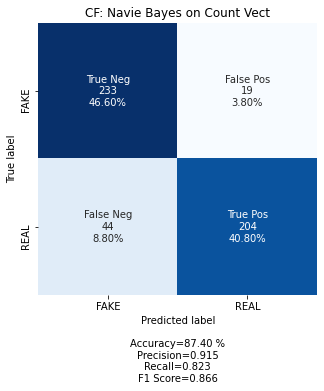

In [0]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['FAKE', 'REAL']
make_confusion_matrix(cf_1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='CF: Navie Bayes on Count Vect')

In [0]:
# with stemming and with num conversion : 87.4,0.907,0.831,0.867
# with stemming and without num conversion: 87.60,0.908,0.835,0.87
# without stemming and with num conversion: 87.4,0.915,0.823,0.866
# without stemming and without num conversion: 87.4,0.915,0.823,0.866

### Logistic Regression

In [0]:
lr = linear_model.LogisticRegression(max_iter=500)
lr.fit(xtrain_count,y_train)
y_preds = lr.predict(xtest_count)

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
cf_2 = confusion_matrix(y_test,y_preds)
print(cf_2)

0.884

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       252
           1       0.87      0.91      0.89       248

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500

[[217  35]
 [ 23 225]]


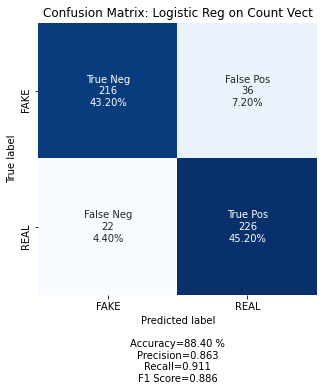

In [0]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['FAKE', 'REAL']
make_confusion_matrix(cf_2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title= 'Confusion Matrix: Logistic Reg on Count Vect')

In [0]:
# with stemming and with num conversion : 87.6,0.869,0.883,0.876
# with stemming and without num conversion : 88,0.873,0.887,0.88
# without stemming and with num conversion : 88.4,0.863,0.911,0.886
# without stemming and without num conversion : 88.4,0.863,0.911,0.886

### Random Forest Classifier

In [0]:
rfc = RandomForestClassifier()
rfc.fit(xtrain_count,y_train)
y_preds = rfc.predict(xtest_count)

0.872

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       252
           1       0.90      0.83      0.87       248

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500

[[229  23]
 [ 41 207]]


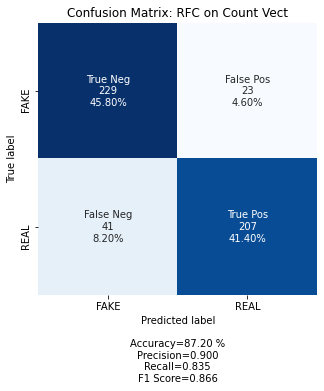

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
cf_3 = confusion_matrix(y_test,y_preds)
print(cf_3)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['FAKE', 'REAL']
make_confusion_matrix(cf_3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title= 'Confusion Matrix: RFC on Count Vect')

In [0]:
# with stemming and with num conversion : 87.20,0.893,0.843,0.867
# with stemming and without num conversion : 86.8,0.896,0.831,0.862
# without stemming and with num conversion : 87,0.903,0.827,0.863
# without stemming and without num conversion : 87.2,0.9,0.835,0.866


### SVM

In [0]:
svc = svm.SVC()
svc.fit(xtrain_count,y_train)
y_preds = svc.predict(xtest_count)

0.818

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       252
           1       0.77      0.91      0.83       248

    accuracy                           0.82       500
   macro avg       0.83      0.82      0.82       500
weighted avg       0.83      0.82      0.82       500

[[183  69]
 [ 22 226]]


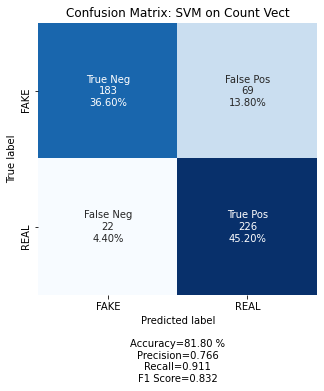

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
cf_4 = confusion_matrix(y_test,y_preds)
print(cf_4)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['FAKE', 'REAL']
make_confusion_matrix(cf_4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title= 'Confusion Matrix: SVM on Count Vect')

In [0]:
# with stemming and with num conversion : 82,0.771,0.907,0.833
# with stemming and without num conversion: 82.2,0.773,0.907,0.835
# without stemming and with num conversion : 82,0.769,0.911,0.834
# without stemming and with num conversion : 81.8,0.766,0.911,0.832

### XGBoost

In [0]:
xgc = xgboost.XGBClassifier()
xgc.fit(xtrain_count,y_train)
y_preds = xgc.predict(xtest_count)

0.894

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       252
           1       0.87      0.92      0.90       248

    accuracy                           0.89       500
   macro avg       0.90      0.89      0.89       500
weighted avg       0.90      0.89      0.89       500

[[218  34]
 [ 19 229]]


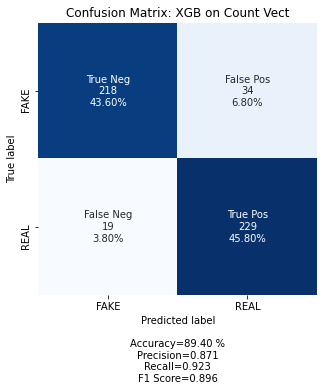

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
cf_5 = confusion_matrix(y_test,y_preds)
print(cf_5)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['FAKE', 'REAL']
make_confusion_matrix(cf_5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title= 'Confusion Matrix: XGB on Count Vect')

In [0]:
# with stemming and with num conversion : 88.6,0.588,0.927,0.890
# with stemming and without num conversion : 88,0.856,0.911,0.883
# without stemming and with num conversion : 89.2,0.870,0.919,0.894
# without stemming and without num conversion : 89.4,0.871,0.923,0.896


## TF-IDF Features

In [0]:
# word level tf-idf

tfidf_vect = TfidfTransformer()
xtrain_tfidf = tfidf_vect.fit_transform(xtrain_count)
xtest_tfidf =  tfidf_vect.transform(xtest_count)

### NBC

In [0]:
nbc = naive_bayes.MultinomialNB()
nbc.fit(xtrain_tfidf,y_train)
y_preds = nbc.predict(xtest_tfidf)

In [0]:
print(accuracy_score(y_test,y_preds))
print(classification_report(y_test,y_preds))
cf_1=confusion_matrix(y_test,y_preds)
cf_1

0.764
              precision    recall  f1-score   support

           0       0.68      0.99      0.81       252
           1       0.99      0.53      0.69       248

    accuracy                           0.76       500
   macro avg       0.83      0.76      0.75       500
weighted avg       0.83      0.76      0.75       500



array([[250,   2],
       [116, 132]])

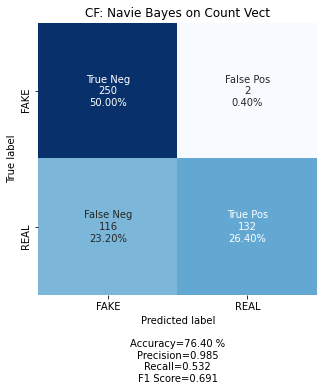

In [0]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['FAKE', 'REAL']
make_confusion_matrix(cf_1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title='CF: Navie Bayes on Count Vect')

In [0]:
# with stemming and with num conversion : 75.4,0.977,0.516,0.675
# with stemming and without num conversion: 75.4,0.977,0.516,0.675
# without stemming and with num conversion: 76.4,0.985,0.532,0.691
# without stemming and without num conversion: 76.2,0.985,0.528,0.688

### Logistic Regression

In [0]:
lr = linear_model.LogisticRegression(max_iter=500)
lr.fit(xtrain_tfidf,y_train)
y_preds = lr.predict(xtest_tfidf)

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
cf_2 = confusion_matrix(y_test,y_preds)
print(cf_2)

0.898

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       252
           1       0.88      0.92      0.90       248

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500

[[221  31]
 [ 20 228]]


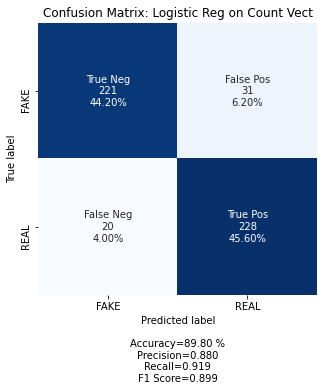

In [0]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['FAKE', 'REAL']
make_confusion_matrix(cf_2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title= 'Confusion Matrix: Logistic Reg on Count Vect')

In [0]:
# with stemming and with num conversion : 89.8,0.877,0.923,0.9
# with stemming and without num conversion : 89.8,0.88,0.919,0.899
# without stemming and with num conversion : 89.8,0.88,0.919,0.899
# without stemming and without num conversion : 89.8,0.88,0.919,0.899

### Random Forest Classifier

In [0]:
rfc = RandomForestClassifier()
rfc.fit(xtrain_tfidf,y_train)
y_preds = rfc.predict(xtest_tfidf)

0.868

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       252
           1       0.88      0.85      0.86       248

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500

[[224  28]
 [ 38 210]]


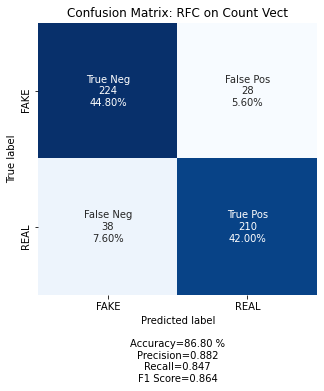

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
cf_3 = confusion_matrix(y_test,y_preds)
print(cf_3)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['FAKE', 'REAL']
make_confusion_matrix(cf_3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title= 'Confusion Matrix: RFC on Count Vect')

In [0]:
# with stemming and with num conversion : 87,0.886,0.847,0.866
# with stemming and without num conversion : 88,0.885,0.871,0.878
# without stemming and with num conversion : 86.8,0.882,0.847,0.864
# without stemming and without num conversion : 85.8,0.864,0.847,0.855


### SVM

In [0]:
svc = svm.SVC()
svc.fit(xtrain_tfidf,y_train)
y_preds = svc.predict(xtest_tfidf)

0.892

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       252
           1       0.86      0.93      0.90       248

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

[[215  37]
 [ 17 231]]


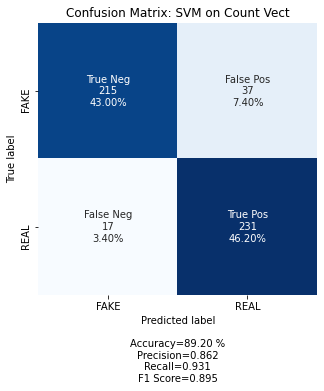

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
cf_4 = confusion_matrix(y_test,y_preds)
print(cf_4)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['FAKE', 'REAL']
make_confusion_matrix(cf_4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title= 'Confusion Matrix: SVM on Count Vect')

In [0]:
# with stemming and with num conversion : 90.2,0.881,0.927,0.904
# with stemming and without num conversion: 90.2,0.881,0.927,0.904
# without stemming and with num conversion : 89.2,0.862,0.931,0.895
# without stemming and without num conversion : 89,0.861,0.927,0.893

### XGBoost

In [0]:
xgc = xgboost.XGBClassifier()
xgc.fit(xtrain_tfidf,y_train)
y_preds = xgc.predict(xtest_tfidf)

0.9

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       252
           1       0.89      0.91      0.90       248

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500

[[224  28]
 [ 22 226]]


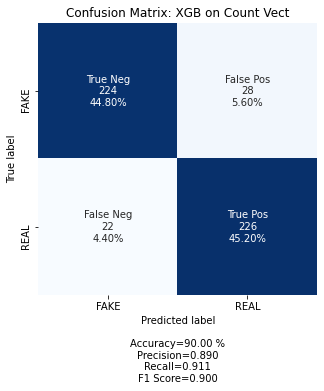

In [0]:
print(accuracy_score(y_test,y_preds))
print()

print(classification_report(y_test,y_preds))
cf_5 = confusion_matrix(y_test,y_preds)
print(cf_5)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['FAKE', 'REAL']
make_confusion_matrix(cf_5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',figsize=(5,5),cbar=False,title= 'Confusion Matrix: XGB on Count Vect')

In [0]:
# with stemming and with num conversion : 88.6,0.869,0.907,0.888
# with stemming and without num conversion : 88.2,0.868,0.899,0.883
# without stemming and with num conversion : 90,0.89,0.911,0.9
# without stemming and without num conversion : 90.6,0.894,0.919,0.907